In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sbs

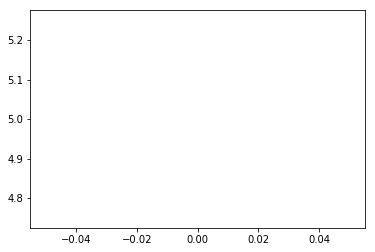

In [22]:
plt.plot(5)

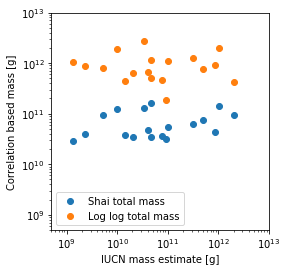

In [16]:
data = pd.read_excel('top_mammal_mass.xlsx')
all_data = data
lm = linear_model.LinearRegression()
data = data[data['Calculation method'] == 'Total populations']

plt.scatter(data['IUCN mass'], data['Shai total mass'])

#plt.xscale('log')
#plt.yscale('log')
lm.fit(np.log10(data['IUCN Population size'].values[:,np.newaxis]),np.log10(data['Shai total num'].values[:,np.newaxis]))
pred_y = lm.predict(np.linspace(4,0,100)[:,np.newaxis])

plt.plot(10**np.linspace(4,0,100),10**pred_y)



#plt.scatter(data['IUCN mass'], data['Geometric mean mass'])
plt.scatter(data['IUCN mass'], data['Log log total mass'])
ax = plt.gca()

ax.loglog()
ax.set_ylim([5e8,1e13])
ax.set_xlim([5e8,1e13])

ax.set_aspect('equal', 'box')
ax.set_xlabel('IUCN mass estimate [g]')
ax.set_ylabel('Correlation based mass [g]')
#plt.ylim(1e10,1e13)
ax.legend()
#ax = data.plot(kind = 'scatter', x='Shai total mass', y='IUCN mass', loglog=True,xlim=[1e10,1e13], ylim=[1e10,1e13])

#data.plot(kind = 'scatter', x='Geometric mean mass', y='IUCN mass', loglog=True,xlim=[1e10,1e13], ylim=[1e10,1e13], ax=ax)
plt.savefig('IUCN_vs_pred.pdf')

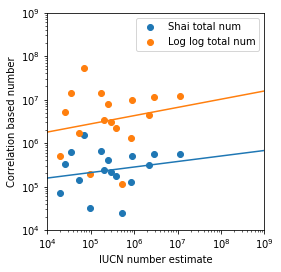

In [18]:
plt.scatter(data['IUCN Population size'],data['Shai total num'])
ax = plt.gca()
ax.set_ylim([1e4,1e9])
ax.set_xlim([1e4,1e9])
ax.loglog()
ax.set_aspect('equal', 'box')

plt.scatter(data['IUCN Population size'],data['Log log total num'])
#model = smf.ols(formula='{IUCN Population size} ~ {Shai total num}', data=data)
lm = linear_model.LinearRegression()
lm2 = linear_model.LinearRegression()
data_set = data[['IUCN Population size','Shai total num']].dropna()
data_set2 = data[['IUCN Population size','Log log total num']].dropna()

lm.fit(np.log10(data_set['IUCN Population size'].values[:,np.newaxis]),np.log10(data_set['Shai total num'].values[:,np.newaxis]))
lm2.fit(np.log10(data_set2['IUCN Population size'].values[:,np.newaxis]),np.log10(data_set2['Log log total num'].values[:,np.newaxis]))
mock_x = np.linspace(4,9,100)
pred_y = lm.predict(mock_x[:,np.newaxis])
pred_y2 = lm2.predict(mock_x[:,np.newaxis])
plt.plot(10**mock_x,10**pred_y)
plt.plot(10**mock_x,10**pred_y2)
#plt.plot(10**mock_x,1.87*(10**mock_x)**0.975)
#plt.plot(10**mock_x,13.8*(10**mock_x)**0.806)
ax.legend()
ax.set_xlabel('IUCN number estimate')
ax.set_ylabel('Correlation based number')
plt.savefig('IUCN_val_number.pdf')

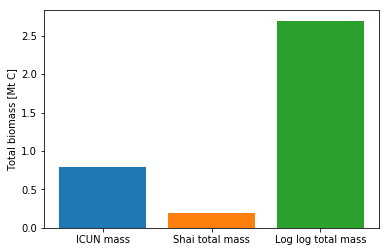

In [38]:
ax = plt.figure()
plt.bar(0,data['IUCN mass'].sum()*0.15/1e12,label='IUCN mass')
plt.bar(1,data['Shai total mass'].sum()*0.15/1e12,label='Shai total mass')
plt.bar(2,data['Log log total mass'].sum()*0.15/1e12,label='Log log total mass')

#(data[['IUCN mass','Shai total mass','Log log total mass']].sum()*0.15/1e12).plot(kind='bar')
ax = plt.gca()
ax.set_ylabel('Total biomass [Mt C]')
ax.set_xticks([0,1,2])
ax.set_xticklabels(('ICUN mass', 'Shai total mass', 'Log log total mass'))
plt.savefig('Total mass.pdf')

[]

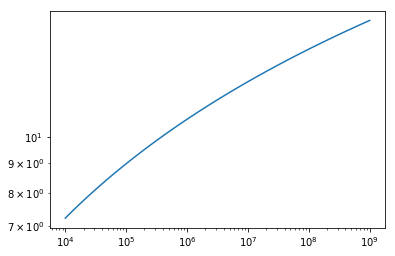

In [122]:
plt.plot(10**np.linspace(4,9,100),1.87*np.linspace(4,9,100)**0.975)
ax = plt.gca()

ax.loglog()


ValueError: In safezip, len(args[0])=63 but len(args[1])=11

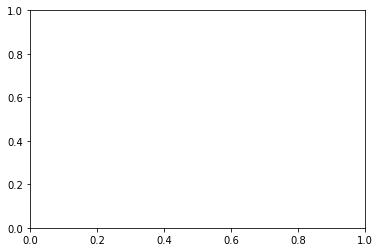

In [52]:
plt.errorbar(data['IUCN Population size'], data['Shai total num'],xerr=data[['Lower range','Upper range']])
ax = plt.gca()
ax.set_ylim([1e4,1e7])
ax.set_xlim([1e4,1e7])
ax.loglog()
ax.set_aspect('equal', 'box')